#### EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm

In [2]:
plt.rc("font", size=12)
sns.set_theme(style="white")
sns.set_theme(style="whitegrid", color_codes=True)

In [3]:
#xl = pd.ExcelFile("cpd merged final v1.xlsx")
data = pd.read_csv("cpd.csv")
#data = xl.parse("cpd merged final")
print(data.shape)

(650, 74)


In [4]:
data['conversion1'].describe( )

count    518.000000
mean       0.774131
std        0.418557
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: conversion1, dtype: float64

In [5]:
print(data.columns)

Index(['Timestamp', '4. ', 'Study ID No.', '6. How old are you? ',
       '7. What is your current job?', 'job type', 'What level? ',
       '8. What is your highest educational attainment? ', 'educ', '9. Sex ',
       'female', '10. Gender Identification ', 'genderid',
       '11. Location (Region) ', 'loc',
       '12. What device(s) are you using to access the social media?',
       'devices', 'devices2',
       '13. What led you in visiting the page? (Choose one)', 'purpose page',
       '14. What is your priority reproductive health need right now? ',
       'perceived rh needs',
       '15. What do you think are the benefits of using family planning?',
       'benefitnum1', 'benefitnum', '16. What platform(s) did you visit? ',
       'platforms1', 'platforms',
       '17. How often do you visit Family Planning and Reproductive Health social media contents? ',
       'oftenvisit',
       '18. How did you learn about CPD and Usap Tayo sa Family Planning FB pages? ',
       'learnpa

In [6]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

#### Touchpoint 1

##### Remove rows with no conversion 1 results

In [7]:
print(data.shape)
data = data.dropna(subset=['conversion1'])
print(data.shape)
cdata1 = pd.DataFrame()     # Dataframe for conversion 1

(650, 74)
(518, 74)


Total respondents at the first conversion: **518**

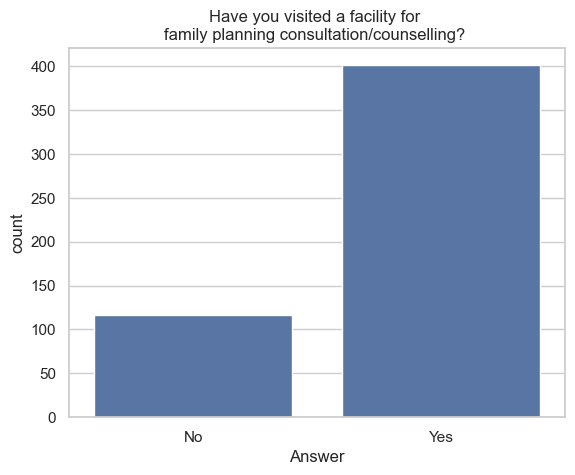

No - 117
Yes - 401


In [8]:
temp = pd.DataFrame()
labels = ['No','Yes']
bins =[0,1,99]
temp['conversion1'] = pd.cut(data['conversion1'], bins=bins, labels=labels, right=False)
sns.countplot(x='conversion1', data=temp)
plt.title(label='Have you visited a facility for \nfamily planning consultation/counselling? ')
plt.xlabel("Answer")
plt.show()

print("No - " + str (((temp['conversion1'] == 'No')).sum() ))
print("Yes - " + str (((temp['conversion1'] == 'Yes')).sum() ))
cdata1['conversion1'] = temp['conversion1']


##### Age

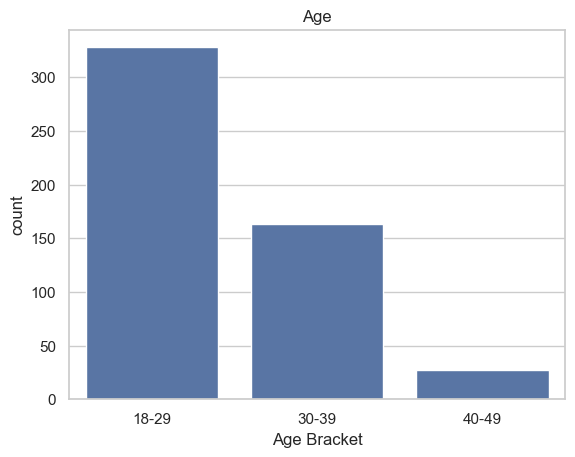

18-29 - 353
30-39 - 144
40-49 - 21


In [9]:

temp = pd.DataFrame()
age_bins =[0,29,39,100]
age_labels = ['18-29','30-39','40-49']
new_age_labels = [0,1,2]
temp['age_bracket'] = pd.cut(data['6. How old are you? '], bins=age_bins, labels=age_labels, right=False)
cdata1['age_bracket'] = pd.cut(data['6. How old are you? '], bins=age_bins, labels=new_age_labels, right=False)

sns.countplot(x='age_bracket', data=temp)
plt.title(label='Age')
plt.xlabel("Age Bracket")
plt.show()

print("18-29 - " + str (((data['6. How old are you? '] >= 18) & (data['6. How old are you? '] <= 29)).sum() ))
print("30-39 - " + str (((data['6. How old are you? '] >= 30) & (data['6. How old are you? '] <= 39)).sum() ))
print("40-49 - " + str (((data['6. How old are you? '] >= 40) & (data['6. How old are you? '] <= 49)).sum() ))


In [10]:
temp['age_bracket'] = label_encoder.fit_transform(cdata1['age_bracket'])
temp['conversion1'] = label_encoder.fit_transform(cdata1['conversion1'])

X = temp['age_bracket']
y = temp['conversion1']

model = sm.Logit(y.astype(int), X.astype(int)) 
result = model.fit()  

print("\nAge Bracket vs Conversion 1:\n")
print(result.summary())

print('\nOdds Ratio:')
print(np.exp(result.params))

Optimization terminated successfully.
         Current function value: 0.653163
         Iterations 5

Age Bracket vs Conversion 1:

                           Logit Regression Results                           
Dep. Variable:            conversion1   No. Observations:                  518
Model:                          Logit   Df Residuals:                      517
Method:                           MLE   Df Model:                            0
Date:                Tue, 28 Jan 2025   Pseudo R-squ.:                 -0.2226
Time:                        09:40:32   Log-Likelihood:                -338.34
converged:                       True   LL-Null:                       -276.73
Covariance Type:            nonrobust   LLR p-value:                       nan
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
age_bracket     0.8531      0.144      5.922      0.000       0.571       1

<Axes: xlabel='age_bracket', ylabel='conversion1'>

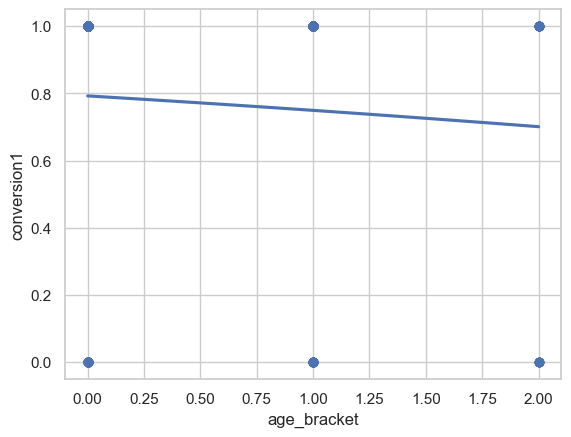

In [11]:
sns.regplot(x=X,y=y, data=temp, logistic=True, ci=None)

###### Analysis
For the relationship with the age bracket to the conversion1, the Pseudo R-squared value is -0.2226 which means that there is no direct relationship with the age bracket to the actual visit to the health facility.

In [12]:
temp['age'] = data['6. How old are you? ']
X = temp['age']
y = temp['conversion1']

model = sm.Logit(y.astype(int), X.astype(int)) 
result = model.fit()  

print("\nAge vs Conversion 1:\n")
print(result.summary())

print('\nOdds Ratio:')
print(np.exp(result.params))

Optimization terminated successfully.
         Current function value: 0.545889
         Iterations 5

Age vs Conversion 1:

                           Logit Regression Results                           
Dep. Variable:            conversion1   No. Observations:                  518
Model:                          Logit   Df Residuals:                      517
Method:                           MLE   Df Model:                            0
Date:                Tue, 28 Jan 2025   Pseudo R-squ.:                -0.02181
Time:                        09:40:32   Log-Likelihood:                -282.77
converged:                       True   LL-Null:                       -276.73
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0417      0.004     11.238      0.000       0.034       0.049

Odds 

<Axes: xlabel='age', ylabel='conversion1'>

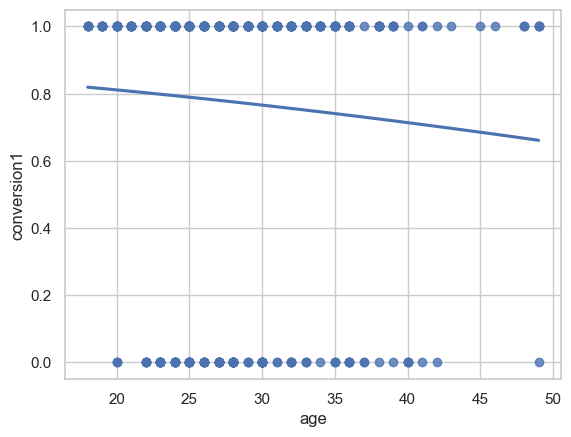

In [13]:
sns.regplot(x=X,y=y, data=temp, logistic=True, ci=None)

###### Analysis
Same for the actual age. The pseudo R-squared value is -0.02181 which means there is no direct relationship with the respondent age to actual visit 

##### Gender

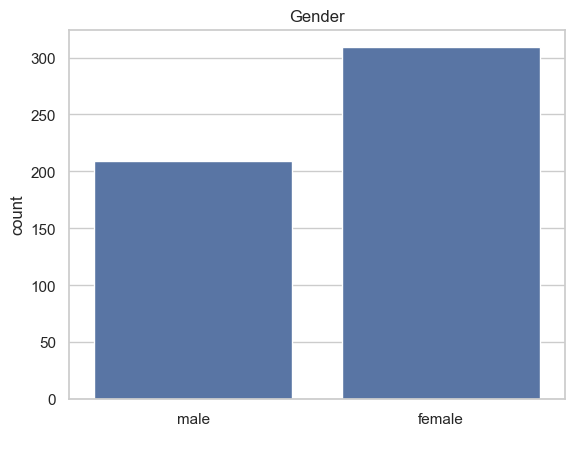

male - 209
female - 309


In [14]:
cdata1['female'] = data['female']
sex_labels = ['male','female']
sex_bins =[0,1,99]
temp['female'] = pd.cut(cdata1['female'], bins=sex_bins, labels=sex_labels, right=False)
sns.countplot(x='female', data=temp)
plt.title(label='Gender')
plt.xlabel(" ")
plt.show()

print("male - " + str (((data['female'] == 0)).sum() ))
print("female - " + str (((data['female'] == 1)).sum() ))


In [15]:
temp['female'] = label_encoder.fit_transform(cdata1['female'])
temp['conversion1'] = label_encoder.fit_transform(cdata1['conversion1'])

X = temp['female']
y = temp['conversion1']

model = sm.Logit(y.astype(int), X.astype(int)) 
result = model.fit()  

print("\nGender vs Conversion 1:\n")
print(result.summary())

print('\nOdds Ratio:')
print(np.exp(result.params))

Optimization terminated successfully.
         Current function value: 0.583964
         Iterations 5

Gender vs Conversion 1:

                           Logit Regression Results                           
Dep. Variable:            conversion1   No. Observations:                  518
Model:                          Logit   Df Residuals:                      517
Method:                           MLE   Df Model:                            0
Date:                Tue, 28 Jan 2025   Pseudo R-squ.:                -0.09308
Time:                        09:40:32   Log-Likelihood:                -302.49
converged:                       True   LL-Null:                       -276.73
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
female         1.3424      0.140      9.562      0.000       1.067       1.618

Od

<Axes: xlabel='female', ylabel='conversion1'>

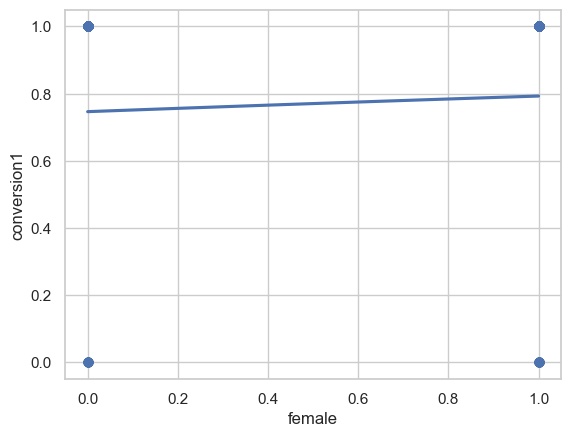

In [16]:
sns.regplot(x=X,y=y, data=temp, logistic=True, ci=None)

###### Analysis
There is no direct relationship with the gender to the actual visit of the participant

In [17]:
# both age_bracket and gender
temp['female'] = label_encoder.fit_transform(cdata1['female'])
temp['age_bracket'] = label_encoder.fit_transform(cdata1['age_bracket'])
temp['conversion1'] = label_encoder.fit_transform(cdata1['conversion1'])

X = temp[['female','age_bracket']]
y = temp['conversion1']

model = sm.Logit(y.astype(int), X.astype(int)) 
result = model.fit()  

print("\nGender and Age bracket vs Conversion 1:\n")
print(result.summary())

print('\nOdds Ratio:')
print(np.exp(result.params))

Optimization terminated successfully.
         Current function value: 0.581056
         Iterations 5

Gender and Age bracket vs Conversion 1:

                           Logit Regression Results                           
Dep. Variable:            conversion1   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Tue, 28 Jan 2025   Pseudo R-squ.:                -0.08764
Time:                        09:40:32   Log-Likelihood:                -300.99
converged:                       True   LL-Null:                       -276.73
Covariance Type:            nonrobust   LLR p-value:                     1.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
female          1.2283      0.154      7.997      0.000       0.

###### Analysis
From the p-value - only the gender is significant in the analysis. Containing both gender and age bracket will result in a Pseudo R-squared value of -0.08764

##### Civil Status

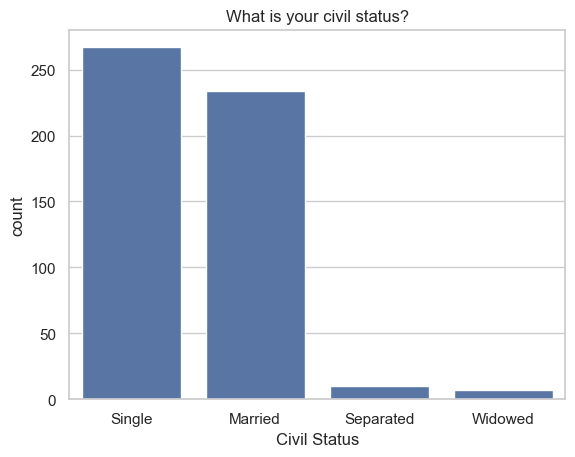

Single - 267
Married - 234
Separated - 10
Widowed - 7


In [18]:
cdata1['civil'] = data['civil']

civil_labels = ['Single','Married','Separated','Widowed']
civil_bins =[1,2,3,4,99]
temp['civil'] = pd.cut(cdata1['civil'], bins=civil_bins, labels=civil_labels, right=False)

sns.countplot(x='civil', data=temp)
plt.title(label='What is your civil status?')
plt.xlabel("Civil Status")
plt.show()
print("Single - " + str (((data['civil'] == 1)).sum() ))
print("Married - " + str (((data['civil'] == 2)).sum() ))
print("Separated - " + str (((data['civil'] == 3)).sum() ))
print("Widowed - " + str (((data['civil'] == 4)).sum() ))

In [19]:
temp['civil_encoded'] = data['civil']
X = temp['civil_encoded']
y = temp['conversion1']

model = sm.Logit(y.astype(int), X.astype(int)) 
result = model.fit()  

print("\nCivil status vs Conversion 1:\n")
print(result.summary())

print('\nOdds Ratio:')
print(np.exp(result.params))

Optimization terminated successfully.
         Current function value: 0.505409
         Iterations 6

Civil status vs Conversion 1:

                           Logit Regression Results                           
Dep. Variable:            conversion1   No. Observations:                  518
Model:                          Logit   Df Residuals:                      517
Method:                           MLE   Df Model:                            0
Date:                Tue, 28 Jan 2025   Pseudo R-squ.:                 0.05396
Time:                        09:40:32   Log-Likelihood:                -261.80
converged:                       True   LL-Null:                       -276.73
Covariance Type:            nonrobust   LLR p-value:                       nan
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
civil_encoded     0.8843      0.074     11.876      0.000       0.738 

<Axes: xlabel='civil_encoded', ylabel='conversion1'>

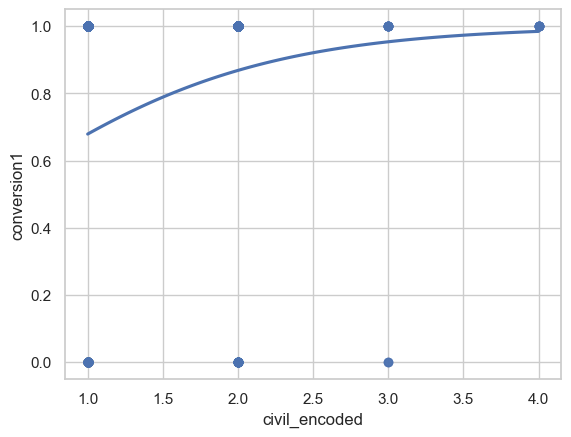

In [20]:
sns.regplot(x=X,y=y, data=temp, logistic=True, ci=None)

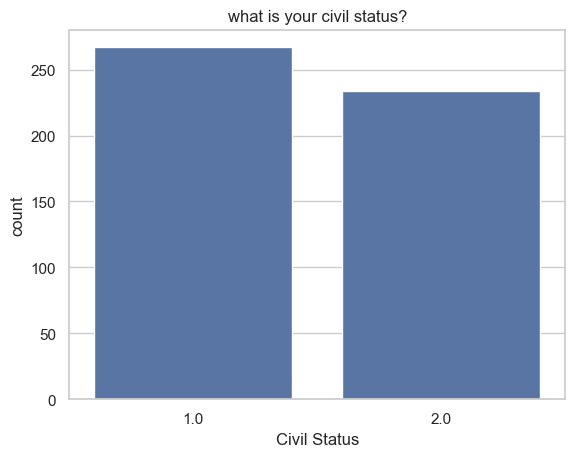

Single - 267
Married - 234


In [21]:
temp2 = pd.DataFrame()
temp2['comversion1'] = temp['conversion1']
temp2 = data[data['civil'] <= 2]

sns.countplot(x='civil', data=temp2)
plt.title(label='what is your civil status?')
plt.xlabel("Civil Status")
plt.show()
print("Single - " + str (((data['civil'] == 1)).sum() ))
print("Married - " + str (((data['civil'] == 2)).sum() ))

In [22]:
X = temp2['civil']
y = temp2['conversion1']

model = sm.Logit(y.astype(int), X.astype(int)) 
result = model.fit()  

print("\nCivil status vs Conversion 1:\n")
print(result.summary())

print('\nOdds Ratio:')
print(np.exp(result.params))

Optimization terminated successfully.
         Current function value: 0.510148
         Iterations 5

Civil status vs Conversion 1:

                           Logit Regression Results                           
Dep. Variable:            conversion1   No. Observations:                  501
Model:                          Logit   Df Residuals:                      500
Method:                           MLE   Df Model:                            0
Date:                Tue, 28 Jan 2025   Pseudo R-squ.:                 0.05304
Time:                        09:40:32   Log-Likelihood:                -255.58
converged:                       True   LL-Null:                       -269.90
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
civil          0.9033      0.077     11.715      0.000       0.752       1.0

<Axes: xlabel='civil', ylabel='conversion1'>

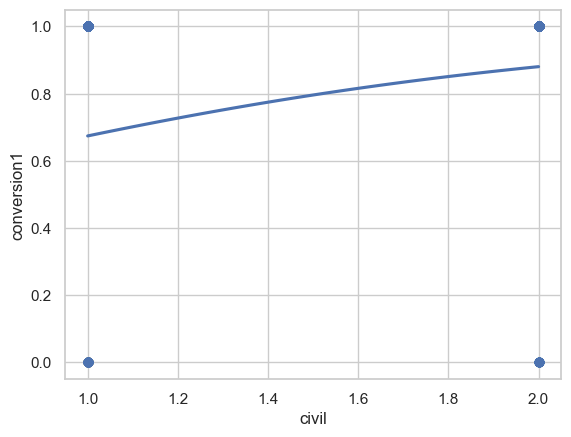

In [23]:
sns.regplot(x=X,y=y, data=temp, logistic=True, ci=None)

###### Analysis
The pseudo R-squared value for the civil status is  0.05396 if all 4 status are included. A value of 0.05304 is calculated if we exclude the separated and widowed which is lower. 

##### Job Type

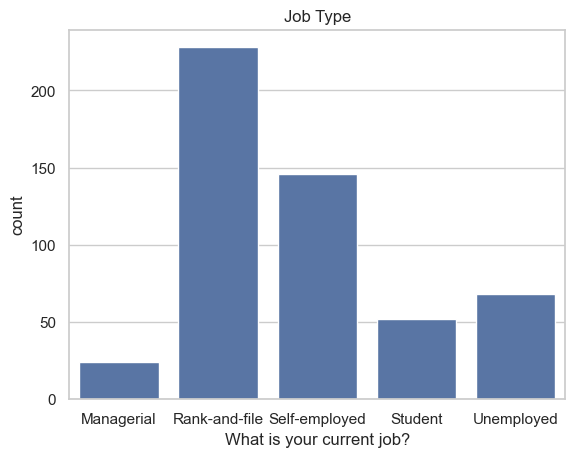

Managerial - 24
Rank-and-file - 228
Self-employed - 146
Student - 52
Unemployed - 68


In [24]:
cdata1['job_type'] = data['job type']

labels = ['Managerial','Rank-and-file','Self-employed',
          'Student','Unemployed']
bins =[1,2,3,4,5,99]
temp['job_type'] = pd.cut(cdata1['job_type'] , bins=bins, labels=labels, right=False)

sns.countplot(x='job_type', data=temp)
plt.title(label='Job Type')
plt.xlabel("What is your current job?")
plt.show()

print("Managerial - " + str (((data['job type'] == 1)).sum() ))
print("Rank-and-file - " + str (((data['job type'] == 2)).sum() ))
print("Self-employed - " + str (((data['job type'] == 3)).sum() ))
print("Student - " + str (((data['job type'] == 4)).sum() ))
print("Unemployed - " + str (((data['job type'] == 5)).sum() ))

In [25]:
temp['job_type'] = label_encoder.fit_transform(cdata1['job_type'])


X = temp['job_type']
y = temp['conversion1']

model = sm.Logit(y.astype(int), X.astype(int)) 
result = model.fit()  

print("\nCivil status vs Conversion 1:\n")
print(result.summary())

print('\nOdds Ratio:')
print(np.exp(result.params))

Optimization terminated successfully.
         Current function value: 0.561557
         Iterations 5

Civil status vs Conversion 1:

                           Logit Regression Results                           
Dep. Variable:            conversion1   No. Observations:                  518
Model:                          Logit   Df Residuals:                      517
Method:                           MLE   Df Model:                            0
Date:                Tue, 28 Jan 2025   Pseudo R-squ.:                -0.05114
Time:                        09:40:33   Log-Likelihood:                -290.89
converged:                       True   LL-Null:                       -276.73
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
job_type       0.5644      0.056     10.021      0.000       0.454       0.6

<Axes: xlabel='job_type', ylabel='conversion1'>

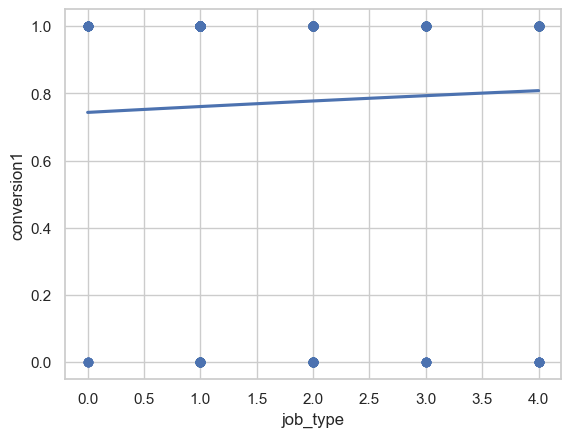

In [26]:
sns.regplot(x=X,y=y, data=temp, logistic=True, ci=None)

###### Analysis
There are no direct relationship between job type to conversion 1

##### Educational Attainment

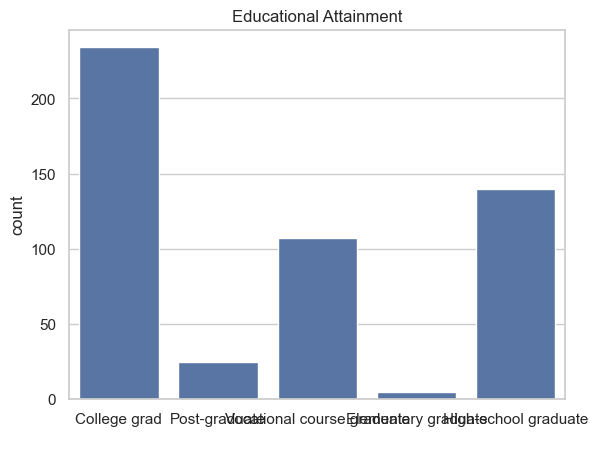

College grad - 234
Post-grad - 25
Voc - 107
Elementary - 5
High School - 140


In [27]:
cdata1['educ'] = data['educ']
labels = ['College grad','Post-graduate','Vocational course graduate','Elementary graduate','High-school graduate']
bins =[1,2,3,4,5,6]
temp['educ'] = pd.cut(cdata1['educ'], bins=bins, labels=labels, right=False)
sns.countplot(x='educ', data=temp)
plt.title(label='Educational Attainment')
plt.xlabel(" ")
plt.show()

print("College grad - " + str (((data['educ'] == 1)).sum() ))
print("Post-grad - " + str (((data['educ'] == 2)).sum() ))
print("Voc - " + str (((data['educ'] == 3)).sum() ))
print("Elementary - " + str (((data['educ'] == 4)).sum() ))
print("High School - " + str (((data['educ'] == 5)).sum() ))


In [28]:
temp['educ'] = label_encoder.fit_transform(cdata1['educ'])


X = temp['educ']
y = temp['conversion1']

model = sm.Logit(y.astype(int), X.astype(int)) 
result = model.fit()  

print("\nEducational attainment vs Conversion 1:\n")
print(result.summary())

print('\nOdds Ratio:')
print(np.exp(result.params))

Optimization terminated successfully.
         Current function value: 0.616340
         Iterations 5

Educational attainment vs Conversion 1:

                           Logit Regression Results                           
Dep. Variable:            conversion1   No. Observations:                  518
Model:                          Logit   Df Residuals:                      517
Method:                           MLE   Df Model:                            0
Date:                Tue, 28 Jan 2025   Pseudo R-squ.:                 -0.1537
Time:                        09:40:33   Log-Likelihood:                -319.26
converged:                       True   LL-Null:                       -276.73
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
educ           0.3692      0.046      7.985      0.000       0.279

In [29]:
# Creating an ordered list from
# Elem - HS - Voc - College - post-grad

mapping = {
    'Elementary graduate (Nagtapos ng elementarya)': 0,
    'High school graduate (Nagtapos ng high school)': 1,
    'Vocational course graduate (Nagtapos ng Kursong vocational)': 2,
    'College graduate (Nagtapos ng kolehiyo)': 3,
    'Post-graduate': 4
}
#data['8. What is your highest educational attainment?'].map(mapping)
cdata1['educ_ord'] = data['8. What is your highest educational attainment? '].map(mapping)

temp['educ_ord'] = label_encoder.fit_transform(cdata1['educ_ord'])


X = temp['educ_ord'] 
y = temp['conversion1']

model = sm.Logit(y.astype(int), X.astype(int)) 
result = model.fit()  

print("\nEducational attainment vs Conversion 1:\n")
print(result.summary())

print('\nOdds Ratio:')
print(np.exp(result.params))

Optimization terminated successfully.
         Current function value: 0.555047
         Iterations 5

Educational attainment vs Conversion 1:

                           Logit Regression Results                           
Dep. Variable:            conversion1   No. Observations:                  518
Model:                          Logit   Df Residuals:                      517
Method:                           MLE   Df Model:                            0
Date:                Tue, 28 Jan 2025   Pseudo R-squ.:                -0.03895
Time:                        09:40:33   Log-Likelihood:                -287.51
converged:                       True   LL-Null:                       -276.73
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
educ_ord       0.4720      0.044     10.657      0.000       0.385

###### Analysis
An ordered educational attainment (elem-hs-voc-col-post grad) gives a slightly lower pseudo R-square value but with less standard error. 

##### Gender Identification

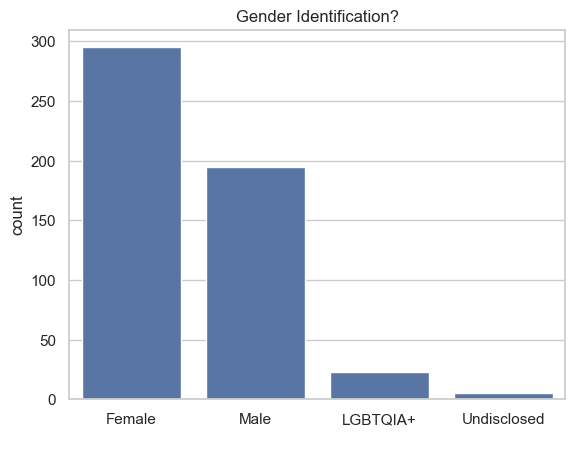

Female - 295
Male - 195
LGBTQIA+ - 23
Undisclosed - 5


In [30]:
cdata1['genderid'] = data['genderid']

labels = ['Female','Male','LGBTQIA+','Undisclosed']
bins =[1,2,3,4,99]
temp['genderid'] = pd.cut(cdata1['genderid'], bins=bins, labels=labels, right=False)

sns.countplot(x='genderid', data=temp)
plt.title(label='Gender Identification?')
plt.xlabel(" ")
plt.show()
print("Female - " + str (((data['genderid'] == 1)).sum() ))
print("Male - " + str (((data['genderid'] == 2)).sum() ))
print("LGBTQIA+ - " + str (((data['genderid'] == 3)).sum() ))
print("Undisclosed - " + str (((data['genderid'] == 4)).sum() ))

In [31]:
temp['genderid_label'] = cdata1['genderid']
X = temp['genderid_label']
y = temp['conversion1']

model = sm.Logit(y.astype(int), X.astype(int)) 
result = model.fit()  

print("\nGender identification vs Conversion 1:\n")
print(result.summary())

print('\nOdds Ratio:')
print(np.exp(result.params))

Optimization terminated successfully.
         Current function value: 0.554427
         Iterations 5

Gender identification vs Conversion 1:

                           Logit Regression Results                           
Dep. Variable:            conversion1   No. Observations:                  518
Model:                          Logit   Df Residuals:                      517
Method:                           MLE   Df Model:                            0
Date:                Tue, 28 Jan 2025   Pseudo R-squ.:                -0.03779
Time:                        09:40:33   Log-Likelihood:                -287.19
converged:                       True   LL-Null:                       -276.73
Covariance Type:            nonrobust   LLR p-value:                       nan
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
genderid_label     0.7417      0.070     10.593      0.000 

##### Location

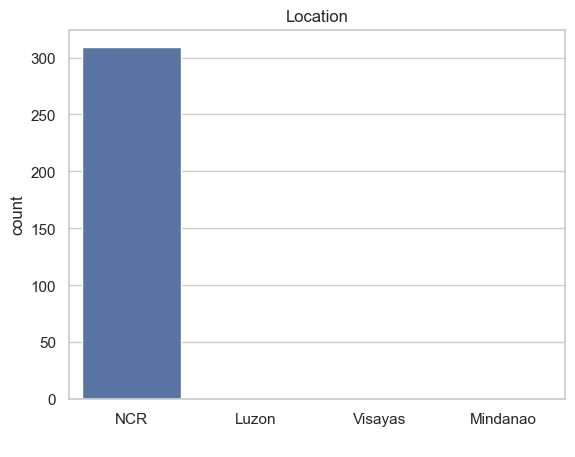

NCR - 336
Luzon - 121
Visayas - 7
Mindanao - 54


In [35]:
cdata1['loc'] = data['loc']
labels = ['NCR','Luzon','Visayas','Mindanao']
bins =[1,2,3,4,99]
temp['loc'] = pd.cut(cdata1['female'], bins=bins, labels=labels, right=False)
sns.countplot(x='loc', data=temp)
plt.title(label='Location')
plt.xlabel(" ")
plt.show()

print("NCR - " + str (((data['loc'] == 1)).sum() ))
print("Luzon - " + str (((data['loc'] == 2)).sum() ))
print("Visayas - " + str (((data['loc'] == 3)).sum() ))
print("Mindanao - " + str (((data['loc'] == 4)).sum() ))

##### Results

In [33]:
temp['age_bracket'] = label_encoder.fit_transform(cdata1['age_bracket'])
temp['female'] = label_encoder.fit_transform(cdata1['female'])
temp['conversion1'] = label_encoder.fit_transform(cdata1['conversion1'])
temp['civil'] = label_encoder.fit_transform(cdata1['civil'])
temp['job_type'] = label_encoder.fit_transform(cdata1['job_type'])
temp['educ_ord'] = label_encoder.fit_transform(cdata1['educ_ord'])
temp['educ'] = label_encoder.fit_transform(cdata1['educ'])


X = temp[['age_bracket', 'female', 'civil', 'job_type','educ']]
y = temp['conversion1']

model = sm.Logit(y.astype(int), X.astype(int)) 
result = model.fit()  

print("\n\nDemographics vs Conversion 1:\n")
print(result.summary())

print('\nOdds Ratio:')
print(np.exp(result.params))

Optimization terminated successfully.
         Current function value: 0.504190
         Iterations 6


Demographics vs Conversion 1:

                           Logit Regression Results                           
Dep. Variable:            conversion1   No. Observations:                  518
Model:                          Logit   Df Residuals:                      513
Method:                           MLE   Df Model:                            4
Date:                Tue, 28 Jan 2025   Pseudo R-squ.:                 0.05624
Time:                        09:40:33   Log-Likelihood:                -261.17
converged:                       True   LL-Null:                       -276.73
Covariance Type:            nonrobust   LLR p-value:                 2.884e-06
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
age_bracket    -0.1007      0.175     -0.575      0.565      -0.444      

In [34]:
temp['age_bracket'] = label_encoder.fit_transform(cdata1['age_bracket'])
temp['female'] = label_encoder.fit_transform(cdata1['female'])
temp['conversion1'] = label_encoder.fit_transform(cdata1['conversion1'])
temp['civil'] = label_encoder.fit_transform(cdata1['civil'])
temp['job_type'] = label_encoder.fit_transform(cdata1['job_type'])

X = temp[[ 'civil', 'job_type', 'female']]
y = temp['conversion1']

model = sm.Logit(y.astype(int), X.astype(int)) 
result = model.fit()  

print("\n\nDemographics vs Conversion 1:\n")
print(result.summary())

print('\nOdds Ratio:')
print(np.exp(result.params))


Optimization terminated successfully.
         Current function value: 0.504521
         Iterations 6


Demographics vs Conversion 1:

                           Logit Regression Results                           
Dep. Variable:            conversion1   No. Observations:                  518
Model:                          Logit   Df Residuals:                      515
Method:                           MLE   Df Model:                            2
Date:                Tue, 28 Jan 2025   Pseudo R-squ.:                 0.05562
Time:                        09:40:33   Log-Likelihood:                -261.34
converged:                       True   LL-Null:                       -276.73
Covariance Type:            nonrobust   LLR p-value:                 2.067e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
civil          1.2527      0.211      5.932      0.000       0.839       1.